# Model Evaluation with K-Fold & Grid Search

- Breast Cancer Dataset (in-built dataset)

### Step 1: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Load the Breast Cancer dataset

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

### Step 3: Split the dataset into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)


### Step 4: Create a Logistic Regression classifier

In [4]:
clf = LogisticRegression(random_state=42)

### Step 5: Perform K-Fold Cross-Validation (K=5) to evaluate the model


In [5]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')

### Step 6: Fit the model on the entire training set


In [6]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Step 7: Make predictions on the test set

In [7]:
y_pred = clf.predict(X_test)

### Step 8: Evaluate the model using classification metrics


In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

### Step 9: Print the K-Fold Cross-Validation results

In [9]:
print("K-Fold Cross-Validation Results:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.2f}")

K-Fold Cross-Validation Results:
Fold 1: 0.94
Fold 2: 0.89
Fold 3: 0.97
Fold 4: 0.98


### Step 10: Print the evaluation metrics and classification report

In [10]:
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Evaluation Metrics:
Accuracy: 0.92
Precision: 0.93
Recall: 0.94
F1 Score: 0.94

Confusion Matrix:
[[37  5]
 [ 4 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.93      0.94      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [11]:
from sklearn import metrics

In [12]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[37  5]
 [ 4 68]]


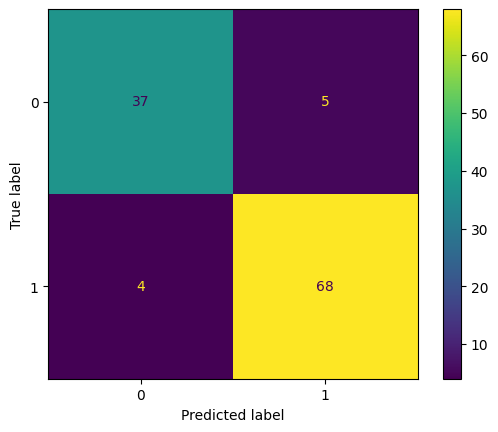

In [13]:
dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion)
dis.plot()

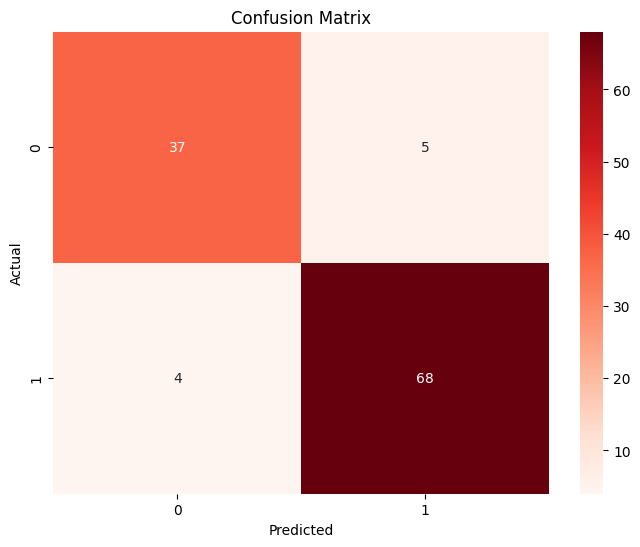

In [14]:
# # Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Step 11: Perform Grid Search for hyperparameter tuning

In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

### Step 12: Get the best hyperparameters

In [16]:
best_params = grid_search.best_params_
best_params

{'C': 10}

### Step 13: Train a Logistic Regression classifier with the best hyperparameters

In [17]:
best_clf = LogisticRegression(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

### Step 14: Make predictions with the tuned model

In [18]:
y_pred_tuned = best_clf.predict(X_test)


### Step 15: Evaluate the tuned model

In [19]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nGrid Search Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy with Tuned Model: {accuracy_tuned:.2f}")


Grid Search Results:
Best Hyperparameters: {'C': 10}
Test Set Accuracy with Tuned Model: 0.93


### Compare result of k-fold & Grid Search

In [20]:
# Perform K-Fold Cross-Validation and store the accuracy scores
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Print and compare the results side by side
print("K-Fold Cross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Test Set Accuracy: {accuracy:.2f}")

print("\nGrid Search Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy with Tuned Model: {accuracy_tuned:.2f}")

K-Fold Cross-Validation Results:
Mean Accuracy: 0.95
Test Set Accuracy: 0.92

Grid Search Results:
Best Hyperparameters: {'C': 10}
Test Set Accuracy with Tuned Model: 0.93
